# The `dataset` Module

In [1]:
from sklearn import datasets
import numpy as np

In [2]:
datasets.*?

In [3]:
boston = datasets.load_boston()
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [4]:
X, y = boston.data, boston.target

# Creating Sample Data

In [5]:
datasets.make_*?

In [6]:
X, y = datasets.make_regression(n_samples=1000, n_features=1,
                                n_informative=1, noise=15,
                                bias=1000, random_state=0)

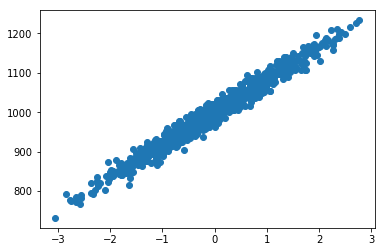

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(X, y);

In [12]:
X, y = datasets.make_blobs(n_samples=300, centers=4,
                           cluster_std=0.6, random_state=0)

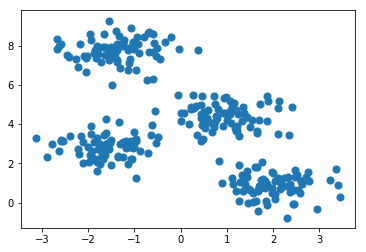

In [13]:
plt.scatter(X[:, 0], X[:, 1], s=50);

# Scaling Data

In [56]:
from sklearn import preprocessing

X, y = boston.data, boston.target
X[:, :3].mean(axis=0)

array([  3.59376071,  11.36363636,  11.13677866])

In [36]:
X[:, :3].std(axis=0)

array([  8.58828355,  23.29939569,   6.85357058])

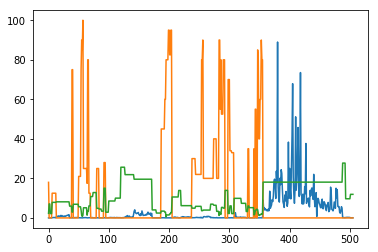

In [37]:
plt.plot(X[:, :3]);

### `preprocessing.scale`

`scale` centers and scales the data using the following formula:
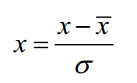

In [38]:
X_2 = preprocessing.scale(X[:, :3])

In [39]:
X_2.mean(axis=0)

array([  6.34099712e-17,  -6.34319123e-16,  -2.68291099e-15])

In [40]:
X_2.std(axis=0)

array([ 1.,  1.,  1.])

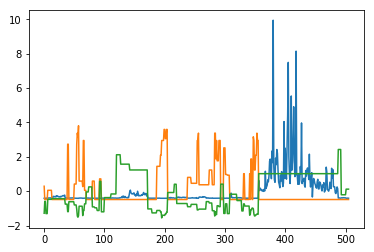

In [42]:
plt.plot(X_2);

### `StandardScaler`

Same as `preprocessing.scale` but persists scale settings across uses.

In [47]:
scaler = preprocessing.StandardScaler()
scaler.fit(X[:, :3])
X_3 = scaler.transform(X[:, :3])
X_3.mean(axis=0)

array([  6.34099712e-17,  -6.34319123e-16,  -2.68291099e-15])

In [48]:
X_3.std(axis=0)

array([ 1.,  1.,  1.])

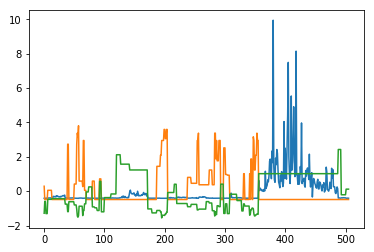

In [49]:
plt.plot(X_3);

### `MinMaxScaler`

Scales data within a specified range.

In [50]:
scaler = preprocessing.MinMaxScaler()
scaler.fit(X[:, :3])
X_4 = scaler.transform(X[:, :3])
X_4.max(axis=0)

array([ 1.,  1.,  1.])

In [51]:
X_4.std(axis=0)

array([ 0.09653024,  0.23299396,  0.25123059])

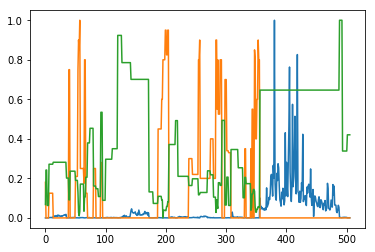

In [52]:
plt.plot(X_4);

In [53]:
scaler = preprocessing.MinMaxScaler(feature_range=(-4, 4))
scaler.fit(X[:, :3])
X_5 = scaler.transform(X[:, :3])

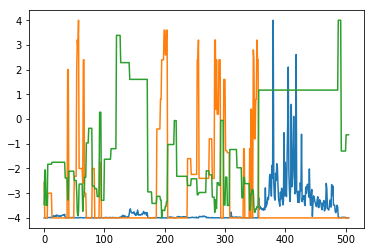

In [54]:
plt.plot(X_5);

# Binarizing Data

### `preprocessing.binarize`

In [62]:
new_target = preprocessing.binarize(boston.target, threshold=boston.target.mean())
new_target[:, :5]

C:\tools\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([[ 1.,  0.,  1.,  1.,  1.]])

In [59]:
(boston.target[:5] > boston.target.mean()).astype(int)

array([1, 0, 1, 1, 1])

### `Binarizer`

In [65]:
bin = preprocessing.Binarizer(boston.target.mean())
new_target = bin.fit_transform(boston.target)
new_target[:, :5]

C:\tools\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\tools\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([[ 1.,  0.,  1.,  1.,  1.]])

# Working with Categorical Variables

### `OneHotEncoder`

In [62]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [63]:
d = np.column_stack((X, y))

In [64]:
encoder = preprocessing.OneHotEncoder()
encoder.fit_transform(d[:, -1:]).toarray()[:5]

array([[ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.]])

### `DictVectorizer`

In [70]:
from sklearn.feature_extraction import DictVectorizer

dv = DictVectorizer()
dict = [{'species': iris.target_names[i]} for i in y]
dv.fit_transform(dict).toarray()[:5]

array([[ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.]])

### Patsy

In [71]:
import patsy
patsy.dmatrix('0 + C(species)', {'species': iris.target})

DesignMatrix with shape (150, 3)
  C(species)[0]  C(species)[1]  C(species)[2]
              1              0              0
              1              0              0
              1              0              0
              1              0              0
              1              0              0
              1              0              0
              1              0              0
              1              0              0
              1              0              0
              1              0              0
              1              0              0
              1              0              0
              1              0              0
              1              0              0
              1              0              0
              1              0              0
              1              0              0
              1              0              0
              1              0              0
              1              0              0
 

# Binarizing Label Features

### `LabelBinarizer`

In [73]:
from sklearn.preprocessing import LabelBinarizer

binarizer = LabelBinarizer()
new_target = binarizer.fit_transform(y)
y.shape, new_target.shape

((150,), (150, 3))

In [74]:
new_target[:5]

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0]])

In [75]:
new_target[-5:]

array([[0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1]])

In [76]:
binarizer.classes_

array([0, 1, 2])

### `LabelBinarizer` and labels

In [77]:
binarizer = LabelBinarizer(neg_label=-1000, pos_label=1000)
binarizer.fit_transform(y)[:5]

array([[ 1000, -1000, -1000],
       [ 1000, -1000, -1000],
       [ 1000, -1000, -1000],
       [ 1000, -1000, -1000],
       [ 1000, -1000, -1000]])

# Inputing Missing Values through Various Strategies

In [66]:
iris = datasets.load_iris()
iris_X = iris.data
masking_array = np.random.binomial(1, .25, iris_X.shape).astype(bool)
iris_X[masking_array] = np.nan

In [67]:
masking_array[:5]

array([[ True, False, False, False],
       [False,  True,  True, False],
       [False, False,  True,  True],
       [False, False, False, False],
       [False,  True,  True, False]], dtype=bool)

In [68]:
iris_X[:5]

array([[ nan,  3.5,  1.4,  0.2],
       [ 4.9,  nan,  nan,  0.2],
       [ 4.7,  3.2,  nan,  nan],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  nan,  nan,  0.2]])

By default, Imputer fills in missing values with the mean.

In [69]:
impute = preprocessing.Imputer()
iris_X_prime = impute.fit_transform(iris_X)
iris_X_prime[:5]

array([[ 5.78962264,  3.5       ,  1.4       ,  0.2       ],
       [ 4.9       ,  3.05      ,  3.91214953,  0.2       ],
       [ 4.7       ,  3.2       ,  3.91214953,  1.19304348],
       [ 4.6       ,  3.1       ,  1.5       ,  0.2       ],
       [ 5.        ,  3.05      ,  3.91214953,  0.2       ]])

In [70]:
impute = preprocessing.Imputer(strategy='median')
iris_X_prime = impute.fit_transform(iris_X)
iris_X_prime[:5]

array([[ 5.7,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  4.5,  0.2],
       [ 4.7,  3.2,  4.5,  1.3],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3. ,  4.5,  0.2]])

In [71]:
iris_X[np.isnan(iris_X)] = -1
iris_X[:5]

array([[-1. ,  3.5,  1.4,  0.2],
       [ 4.9, -1. , -1. ,  0.2],
       [ 4.7,  3.2, -1. , -1. ],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. , -1. , -1. ,  0.2]])

In [72]:
impute = preprocessing.Imputer(missing_values=-1)
iris_X_prime = impute.fit_transform(iris_X)
iris_X_prime[:5]

array([[ 5.78962264,  3.5       ,  1.4       ,  0.2       ],
       [ 4.9       ,  3.05      ,  3.91214953,  0.2       ],
       [ 4.7       ,  3.2       ,  3.91214953,  1.19304348],
       [ 4.6       ,  3.1       ,  1.5       ,  0.2       ],
       [ 5.        ,  3.05      ,  3.91214953,  0.2       ]])

# Using Pipelines for Multiple Preprocessing Steps

In [73]:
mat = datasets.make_spd_matrix(10)
masking_array = np.random.binomial(1, .1, mat.shape).astype(bool)
mat[masking_array] = np.nan
mat[:4, :4]

array([[ 4.12020683,  0.4974037 , -0.29608592, -1.22669305],
       [ 0.4974037 ,  0.56325801,  0.02407782, -0.11747374],
       [-0.29608592,  0.02407782,         nan,  0.16361543],
       [-1.22669305, -0.11747374,  0.16361543,         nan]])

How to create a pipeline:

In [75]:
from sklearn import pipeline

pipe = pipeline.Pipeline([('impute', impute), ('scaler', scaler)])
pipe

Pipeline(steps=[('impute', Imputer(axis=0, copy=True, missing_values=-1, strategy='mean', verbose=0)), ('scaler', MinMaxScaler(copy=True, feature_range=(-4, 4)))])

In [76]:
new_mat = pipe.fit_transform(mat)
new_mat[:4, :4]

array([[ 4.        ,  3.33110114, -4.        , -4.        ],
       [-0.07989265,  4.        ,  0.05499825,  0.26900622],
       [-0.97349695, -1.47658944,  1.42109176,  0.42517525],
       [-2.0215189 , -2.91436445,  2.10470748,  2.01959329]])

To be included in Pipeline, objects should have `fit`, `transform`, and `fit_transform` methods. 

# Reducing Dimensionality with PCA (Principal Component Analysis)

In [108]:
iris = datasets.load_iris()
iris_X = iris.data

In [109]:
from sklearn import decomposition

pca = decomposition.PCA()
pca

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [110]:
iris_pca = pca.fit_transform(iris_X)
iris_pca[:5]

array([[ -2.68420713e+00,   3.26607315e-01,  -2.15118370e-02,
          1.00615724e-03],
       [ -2.71539062e+00,  -1.69556848e-01,  -2.03521425e-01,
          9.96024240e-02],
       [ -2.88981954e+00,  -1.37345610e-01,   2.47092410e-02,
          1.93045428e-02],
       [ -2.74643720e+00,  -3.11124316e-01,   3.76719753e-02,
         -7.59552741e-02],
       [ -2.72859298e+00,   3.33924564e-01,   9.62296998e-02,
         -6.31287327e-02]])

PCA transforms the covariances of the data into column vectors that show certain percentages of the variance:

In [156]:
pca.explained_variance_ratio_

array([ 0.92461621,  0.05301557,  0.01718514])

High-dimensionality is problematic in data analysis. Consider representing data in fewer dimensions when models overfit on high-dimensional datasets.

In [157]:
pca = decomposition.PCA(n_components=2)
iris_X_prime = pca.fit_transform(iris_X)
iris_X.shape, iris_X_prime.shape

((150, 4), (150, 2))

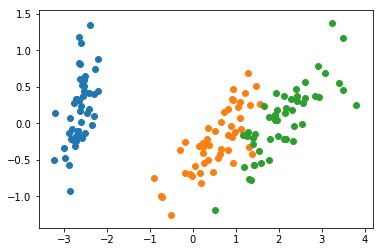

In [225]:
plt.scatter(iris_X_prime[:49, 0], iris_X_prime[:49, 1]);
plt.scatter(iris_X_prime[50:99, 0], iris_X_prime[50:99, 1]);
plt.scatter(iris_X_prime[100:150, 0], iris_X_prime[100:150, 1]);

In [114]:
pca.explained_variance_ratio_.sum()

0.97763177502480336

You can create a PCA with the desired variance to be explained:

In [115]:
pca = decomposition.PCA(n_components=.98)
iris_X_prime = pca.fit(iris_X)
pca.explained_variance_ratio_.sum()

0.99481691454981014

# Using Factor Analysis for Decomposition

Factor analysis differs from PCA in that it makes assumptions about which implicit features underlie the explicit features of a dataset.

In [116]:
from sklearn.decomposition import FactorAnalysis

In [117]:
fa = FactorAnalysis(n_components=2)
iris_two_dim = fa.fit_transform(iris.data)
iris_two_dim[:5]

array([[-1.33125848, -0.55846779],
       [-1.33914102,  0.00509715],
       [-1.40258715,  0.307983  ],
       [-1.29839497,  0.71854288],
       [-1.33587575, -0.36533259]])

# Kernel PCA for Nonlinear Dimensionality Reduction

When data is not lineraly seperable, Kernel PCA can help. Here, data is projected by the kernel function and then PCA is performed.

In [180]:
A1_mean = [1, 1]
A1_cov = [[2, .99], [1, 1]]
A1 = np.random.multivariate_normal(A1_mean, A1_cov, 50)

A2_mean = [5, 5]
A2_cov = [[2, .99], [1, 1]]
A2 = np.random.multivariate_normal(A2_mean, A2_cov, 50)

A = np.vstack((A1, A2))

B_mean = [5, 0]
B_cov = [[.5, -1], [-.9, .5]]
B = np.random.multivariate_normal(B_mean, B_cov, 100)

C:\tools\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: covariance is not positive-semidefinite.
  del sys.path[0]


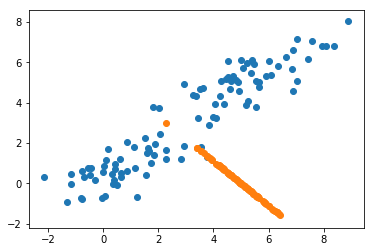

In [181]:
plt.scatter(A[:, 0], A[:, 1]);
plt.scatter(B[:, 0], B[:, 1]);

In [182]:
kpca = decomposition.KernelPCA(kernel='cosine', n_components=1)
AB = np.vstack((A, B))
AB_transformed = kpca.fit_transform(AB)

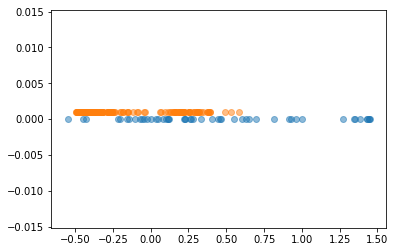

In [183]:
plt.scatter(AB_transformed[:50], np.zeros(AB_transformed[:50].shape), alpha=0.5);
plt.scatter(AB_transformed[50:], np.zeros(AB_transformed[50:].shape)+0.001, alpha=0.5);

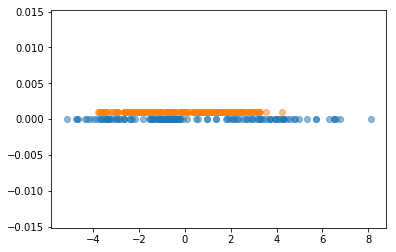

In [184]:
pca = decomposition.PCA(n_components=2)
AB_prime = pca.fit_transform(AB)
plt.scatter(AB_prime[:, 0], np.zeros(AB_prime[:, 0].shape), alpha=0.5);
plt.scatter(AB_prime[:, 1], np.zeros(AB_prime[:, 1].shape)+0.001, alpha=0.5);

# Using Truncated SVD to Reduce Dimensionality

Singular Value Decomposition (SVD) factors a matrix `M` into three matrices: `U`, `Σ`, and `V`. Whereas PCA factors the covariance matrix, SVD factors the data matrix itself.

Given an `n x n` matrix, SVD will create an `n`-column matrix. Truncated SVD will create an arbitrary columned dataset based on the specified number.

In [191]:
iris = datasets.load_iris()
iris_data = iris.data
itis_target = iris.target

In [192]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(2)
iris_transformed = svd.fit_transform(iris_data)
iris_data[:5]

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2]])

In [193]:
iris_transformed[:5]

array([[ 5.91220352,  2.30344211],
       [ 5.57207573,  1.97383104],
       [ 5.4464847 ,  2.09653267],
       [ 5.43601924,  1.87168085],
       [ 5.87506555,  2.32934799]])

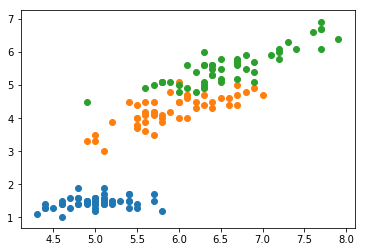

In [202]:
plt.scatter(iris_data[:50, 0], iris_data[:50, 2]);
plt.scatter(iris_data[50:100, 0], iris_data[50:100, 2]);
plt.scatter(iris_data[100:150, 0], iris_data[100:150, 2]);

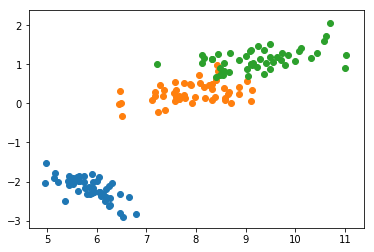

In [200]:
plt.scatter(iris_transformed[:50, 0], -iris_transformed[:50, 1]);
plt.scatter(iris_transformed[50:100, 0], -iris_transformed[50:100, 1]);
plt.scatter(iris_transformed[100:150, 0], -iris_transformed[100:150, 1]);

### How It Works

In [204]:
from scipy.linalg import svd

D = np.array([[1, 2], [1, 3], [1, 4]])
D

array([[1, 2],
       [1, 3],
       [1, 4]])

In [205]:
U, S, V = svd(D, full_matrices=False)
U.shape, S.shape, V.shape

((3, 2), (2,), (2, 2))

In [206]:
np.dot(U.dot(np.diag(S)), V)

array([[ 1.,  2.],
       [ 1.,  3.],
       [ 1.,  4.]])

In [207]:
new_S = S[0]
new_U = U[:, 0]
new_U.dot(new_S)

array([-2.20719466, -3.16170819, -4.11622173])

# Decomposition to Classify with DictionaryLearning

`DictionaryLearning` assumes that the features are the basis for the resulting datasets.

In [214]:
from sklearn.decomposition import DictionaryLearning

dl = DictionaryLearning(3) # 3 species of iris
transformed = dl.fit_transform(iris_data[::2])
transformed[:5]

(75, 3)

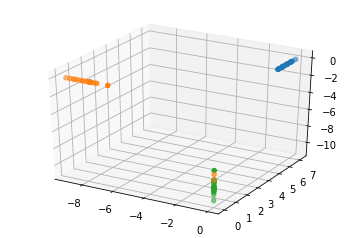

In [217]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(transformed[0:24, 0], transformed[0:24, 1], transformed[0:24, 2]);
ax.scatter(transformed[25:49, 0], transformed[25:49, 1], transformed[25:49, 2]);
ax.scatter(transformed[50:75, 0], transformed[50:75, 1], transformed[50:75, 2]);


In [223]:
transformed = dl.transform(iris_data[1::2])

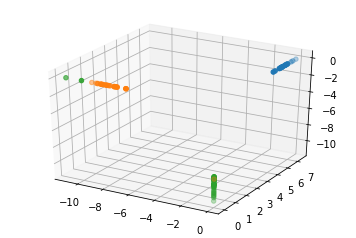

In [224]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(transformed[0:24, 0], transformed[0:24, 1], transformed[0:24, 2]);
ax.scatter(transformed[25:49, 0], transformed[25:49, 1], transformed[25:49, 2]);
ax.scatter(transformed[50:75, 0], transformed[50:75, 1], transformed[50:75, 2]);